# Data pre-processing Module

In [80]:
from numpy.random import RandomState
import pandas as pd
import os
import numpy

class Data_Preprocessing:

  def __init__(self):
    pass

  def load_data(self):
    os.environ['KAGGLE_USERNAME'] = "nesmamohamed"
    os.environ['KAGGLE_KEY'] = "0be1d161a7d5c9610c323fef54e35354"
    !kaggle competitions download -c digit-recognizer
    !unzip test.csv.zip -d test
    !unzip train.csv.zip -d train_validation
    !mkdir validation
    !mkdir train
    !mkdir labels
    df = pd.read_csv('train_validation/train.csv')
    test = pd.read_csv('test/test.csv')
    #to generate the same data everytime we split
    train = df.sample(frac=0.8, random_state=8)
    validation = df.loc[~df.index.isin(train.index)]
    validation.to_csv('validation/validation.csv', index=False)
    train.to_csv('train/train.csv',index=False)
    train = train.reset_index(drop=True)
    validation = validation.reset_index(drop=True)
    return train,validation,test

  def transform_data(self,train_,validation_,test_):
    train = train_
    validation = validation_
    test = test_
    #train
    train_label = train['label']
    train_label.to_csv('labels/train_labels.csv',index=False)
    train_labels_array = numpy.loadtxt(open("labels/train_labels.csv", "rb"), delimiter=",", skiprows=1)
    train = train.drop(columns=['label'])
    train.to_csv('train/train.csv',index=False)
    train_array = numpy.loadtxt(open("train/train.csv", "rb"), delimiter=",", skiprows=1)
    #validation
    validation_label = validation['label']
    validation_label.to_csv('labels/validation_labels.csv',index=False)
    validation_labels_array = numpy.loadtxt(open("labels/validation_labels.csv", "rb"), delimiter=",", skiprows=1)
    validation = validation.drop(columns=['label'])
    validation.to_csv('validation/validation.csv',index=False)
    validation_array = numpy.loadtxt(open("validation/validation.csv", "rb"), delimiter=",", skiprows=1)  
    #test
    test_array = numpy.loadtxt(open("test/test.csv", "rb"), delimiter=",", skiprows=1)
    return train_labels_array,validation_labels_array,train_array,validation_array,test_array

  def normalize_data(self,train_array_,validation_array_):
      train_array = train_array_
      validation_array = validation_array_
      train_array = train_array.astype('float32')
      train_array /= 255
      validation_array = validation_array.astype('float32')
      validation_array /= 255
      return train_array,validation_array

## Data_preprocessing unit testing


In [81]:
# data_preprocessor = Data_Preprocessing()
# train,validation,test = data_preprocessor.load_data()
# train_label,validation_label,train_array,validation_array,test_array = data_preprocessor.transform_data(train,validation,test)
# train_array,validation_array = data_preprocessor.normalize_data(train_array,validation_array)

# Evaluation Module

In [82]:
import numpy as np

class Evaluation:

  def __init__(self):
    pass

  def accuracy(self,y_true, y_pred):
    correct_labels = 0
    for true, pred in zip(y_true,y_pred):
      if true == pred:
        correct_labels += 1
    return correct_labels / len(y_true)
  
  def true_positive(self,positive,y_true, y_pred):
    """
    Input :- y_true - list of actual values
        y_pred - list of predicted values
    Output :- number of true positives
    """
    tp_counts = 0
    for true, pred in zip(y_true, y_pred):
      if true==positive and pred==positive:
        tp_counts += 1
    return tp_counts

  def true_negative(self,positive,y_true, y_pred):
    """
    Input :- y_true - list of actual values
        y_pred - list of predicted values
    Output :- number of true negatives
    """
    tn_counts = 0
    for true, pred in zip(y_true, y_pred):
      if true!=positive and pred!=positive:
        tn_counts += 1
    return tn_counts


  def false_positive(self,positive,y_true, y_pred):
    """
    Input :- y_true - list of actual values
        y_pred - list of predicted values
    Output :- number of false positives
    """
    fp_counts = 0
    for true,pred in zip(y_true, y_pred):
      if true!=positive and pred==positive:
        fp_counts += 1
    return fp_counts


  def false_negative(self,positive,y_true, y_pred):
    """
    Input :- y_true - list of actual values
        y_pred - list of predicted values
    Output :- number of false negatives
    """
    fn_counts = 0
    for true, pred in zip(y_true, y_pred):
      if true==positive and pred!=positive:
        fn_counts += 1
    return fn_counts

  def precision_score(self,positive,y_true, y_pred):
    """
    Input :- y_true :- list of actual values
        y_pred :- list of predicted values
    Output:- float value of precision score
    """
    tp = self.true_positive(positive,y_true, y_pred)
    fp = self.false_positive(positive,y_true, y_pred)

    precision_value = tp/(tp+fp+1e-16)
    return precision_value

  def recall_score(self,positive,y_true, y_pred):
    """
    Input :- y_true :- list of actual values
        y_pred :- list of predicted values
    Output:- float value of precision score
    """
    tp = self.true_positive(positive,y_true, y_pred)
    fn = self.false_negative(positive,y_true, y_pred)
    recall_value = tp/(tp+fn+1e-16)
    return recall_value

  def f1_score(self,positive,y_true, y_pred):
    """
    Input :- y_true :- list of actual values
        y_pred :- list of predicted values
    Output:- float value of f1_score
    """
    p = self.precision_score(positive,y_true, y_pred)
    r = self.recall_score(positive,y_true, y_pred)

    f1_score_value = 2 * p * r /(p+r+1e-16)
    return f1_score_value
  
  def get_confusion_matrix_components(self,no_of_classes,y_ture, y_pred):

    array = np.empty((0),int)
    matrix_dict = {}
    true_class_list = list(range(1, no_of_classes + 1 ))
    predicted_class_list = list(range(1, no_of_classes + 1 ))
    for true_class in true_class_list :
      for predicted_class in predicted_class_list:
        cnt = 0
        for i in range(y_ture.shape[0]):
          if y_ture[i] == true_class and y_pred[i] == predicted_class :
            cnt +=1
        array = np.append(array,[cnt],axis=0)
    array = array.reshape(no_of_classes,-1)
    for i in range(no_of_classes) :
      matrix_dict["class_"+str(i+1)] = array[i]
      # print("class_"+str(i))
    return matrix_dict

# Utils Module

In [83]:
import pickle
import gzip

class utils:
  
  def __init__(self):
    pass

  # using gzip
  
  def save_model_compressed(self,model,filename):
    filename_ = filename + ".gz"
    outfile = gzip.open(filename_,'wb')
    pickle.dump(model,outfile)
    outfile.close()

  def load_model_compressed(self,filename):
    filename = filename+".gz"
    infile = gzip.open(filename,'rb')
    loaded_nn = pickle.load(infile)
    infile.close()
    return loaded_nn
    
  # without gzip

  def save_model(self,model,filename):
    filename_ = filename
    outfile = open(filename_,'wb')
    pickle.dump(model,outfile)
    outfile.close()
          
  def load_model(self,filename):
      infile = open(filename,'rb')
      loaded_nn = pickle.load(infile)
      infile.close()
      return loaded_nn

# Visualization Module

In [153]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from PIL import Image
import numpy as np
import pandas as pd


class visualization:

    def __init__(self):
        style.use('seaborn')
        pass

    def view_photo_sample(self,sample,width,height,rgb):
        """
        :Description: 
        Displays an RGB or gray scale image from an input array and saves it in sample.jpg file.

        :parameter sample: input sample as an array of pixels.
        :type sample: array of float or int with image size and any shape.
        :parameter w: required image width.
        :type w: int.
        :parameter h: required image height.
        :type h: int.
        :parameter rgb: states wether the image is rgb or gray scale.
        :type rgb: bool.
        :returns:  none.
        """
        if rgb:
            data = (np.array(sample)*255).reshape(width,height,3)
            img = Image.fromarray(data.astype(np.uint8), 'RGB')
        else:
            data = (np.array(sample)*255).reshape(width,height)
            img = Image.fromarray(data.astype(np.uint8), 'L')

        img.show()
        img.save("sample.jpg")

    def __init(self):
      pass

        

    def __animate(self,i,values,xs,ys,title):
        """
        :Description: 
        A private helper method called by Funcanimate every time interval .

        :parameter i: frame number.
        :type i: int.
        :parameter values: values to be plotted.
        :type values: array of int.
        :parameter xs: empty array to be filled each frame with the frame number.
        :type xs: array of float.
        :parameter ys: empty array to be filled each frame from the values array with the coresponding value.
        :type ys: array of float.
        :parameter title: figure title.
        :type title: str.
        :returns: none.
        """
        xs.append(i)
        ys.append(values[i])
        plt.cla()
        plt.title(title)
        plt.xlabel("iteration")
        plt.ylabel(title)
        plt.plot(xs,ys,color='purple')
        
        

    def live_visualization(self,values):
        """
        :Description: 
        Plots a live visualization for the input vs the number of iterations.

        :parameter values: input values to be graphed.
        :type values: dictionary whose key is the label(str)  and whose items are the values(float) of that label.
        :returns: none.
        """
        title = list(values.keys())[0]
        size = len(values[title])
        xs = []
        ys = []
        ani = animation.FuncAnimation(plt.gcf(), self.__animate,init_func=self.__init, interval=1000,frames=size,fargs=(values[title],xs,ys,title),repeat=False).save(f'{title}.gif', writer='pillow')
        plt.tight_layout()
        plt.show()
        


    def visualize(self,X,Y):
        """
        :Description: 
        plots a graph for the given x,y values and can plot multiple y values for the given x value.

        :parameter X: The label and values on the x axis.
        :type X: dictionary whose key is the label(str)  and whose items are the values(float) of that label.
        :parameter Y: The values on the y axis associated with its name
        :type Y: dictionary each key is the label(str)  and each associated items are the values(float) of that label.
        :returns: none.
        """

        plt.xlabel(list(X.keys())[0])
        for lab,y in Y.items():
            plt.plot(list(X.values())[0],y,label=lab)
        plt.legend()
        plt.show()

    def visualize_multiple_XY(self,xlabel,ylabel,d):
        """
        :Description: 
        plots a graph for the given input.

        :parameter xlabel: The value printed on the x axis.
        :type xlabel: str.
        :parameter ylabel: The value printed on the y axis.
        :type ylabel: str.
        :parameter d: The x and y values for each graph.
        :type d: dictionary with each sub graph label(str) and its x,y(float) values.
        :returns: none.
        """
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        for lab,p in d.items():
            x=p[0]
            y=p[1]
            plt.plot(x,y,label=lab)
        plt.legend()
        plt.show()
    
    def draw_table(self,dic):
      d={'Predict/true':list(dic.keys())}
      d.update(dic)
      df = pd.DataFrame(d)
      data = df
      cell_text = np.array(data)
      row_labels = data.index
      col_labels = data.columns
      ytable = plt.table(cellText=cell_text, colLabels=col_labels, loc="center right")
      plt.axis("off")
      plt.grid(False)
      plt.savefig('table.png')
    
    def visualize_PR(self,xlabel,ylabel,X,Y):
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      for (labx,x), (laby,y) in zip(X.items(), Y.items()):
          plt.plot(x,y,label=laby)
      plt.legend()
      plt.show()	





# Activation Functions Helper Fns 
(functional.py)

In [85]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return x*(x > 0)

def relu_prime(x):
    return 1*(x > 0)

def leaky_relu(x, alpha):
    return x*(x > 0) + alpha*x*(x <= 0)

def leaky_relu_prime(x, alpha):
    return 1*(x > 0) + alpha*(x <= 0)

def softmax(x):
    exp_x = np.exp(x)
    probs = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return probs

# Function Abstract Class
(function.py)

In [86]:
class Function: 
    """
    Abstract model of a differentiable function.
    """
    def __init__(self, *args, **kwargs): 

        # initializing cache for intermediate results , intermediate results are used with backprop
        self.cache = {}
        # cache for gradients/adjoints
        self.grad = {} 

    def __call__(self, *args, **kwargs): 

        # calculating output
        output = self.forward(*args, **kwargs)
        # print("out in function = ",output.shape)

        # calculating and caching local gradients
        self.grad = self.local_grad(*args, **kwargs)

        return output

    def forward(self, *args, **kwargs):
        """
        Forward pass of the function. Calculates the output value (label) and the
        gradient at the input as well.
        """
        pass

    def backward(self, *args, **kwargs):
        """
        Backward pass. Computes the local gradient at the input value
        after forward pass.
        """
        pass

    def local_grad(self, *args, **kwargs):
        """
        Calculates the local gradients of the function at the given input.

        Returns:
            grad: dictionary of local gradients.
        """
        pass

# Activation Class
(activations.py)

In [87]:
import numpy as np
#from .functional import *
#from .function import *

class Sigmoid(Function): 
    def forward(self, X):
        return sigmoid(X)

    def backward(self, dY):
        return dY * self.grad['X']

    def local_grad(self, X):
        grads = {'X': sigmoid_prime(X)} 
        return grads

class ReLU(Function):
    def forward(self, X):
        return relu(X)

    def backward(self, dY):
        return dY * self.grad['X']

    def local_grad(self, X):
        grads = {'X': relu_prime(X)}
        return grads

class LeakyReLU(Function):
    def __init__(self,alpha):
        super().__init__()
        self.alpha =alpha		
		
    def forward(self, X):
        return leaky_relu(X,self.alpha)

    def backward(self, dY):
        return dY * self.grad['X']

    def local_grad(self, X):
        grads = {'X': leaky_relu_prime(X,self.alpha)}
        return grads

class Softmax(Function):

    def forward(self, X):
        return softmax(X)

    def backward(self, dY):
        return dY 

    def local_grad(self,X):
        pass 

# Losses class
(losses.py)


In [88]:
import numpy as np
#from .function import *

class Loss(Function):
    def forward(self, X, Y):
        """
        Computes the loss of x with respect to y.

        Args:
            X: numpy.ndarray of shape (n_batch, n_dim).
            Y: numpy.ndarray of shape (n_batch, n_dim).

        Returns:
            loss: numpy.float.
        """
        pass

    def backward(self):
        """
        Backward pass for the loss function. Since it should be the final layer
        of an architecture, no input is needed for the backward pass.

        Returns:
            gradX: numpy.ndarray of shape (n_batch, n_dim). Local gradient of the loss.
        """
        # loss doesn't need to be back-propagated because it is the first thing to be back-prpagated
        return self.grad['X'] 
		

    def local_grad(self, X, Y):
        """
        Local gradient with respect to X at (X, Y).

        Args:
            X: numpy.ndarray of shape (n_batch, n_dim).
            Y: numpy.ndarray of shape (n_batch, n_dim).

        Returns:
            gradX: numpy.ndarray of shape (n_batch, n_dim).
        """
        pass


class MeanSquareLoss(Loss):
    def forward(self, X, Y):
        """
        Computes the mean square error of X with respect to Y.

        Args:
            X: numpy.ndarray of shape (n_batch, n_dim).
            Y: numpy.ndarray of shape (n_batch, n_dim).

        Returns:
            mse_loss: numpy.float. Mean square error of x with respect to y.
        """
        # calculating loss

        Y = Y.reshape(X.shape[0],1)

        sum = np.sum((X - Y) ** 2, axis=1, keepdims=True) 
        mse_loss = np.mean(sum) 

        return mse_loss

    def local_grad(self, X, Y):
        """
        Local gradient with respect to X at (X, Y).

        Args:
            X: numpy.ndarray of shape (n_batch, n_dim).
            Y: numpy.ndarray of shape (n_batch, n_dim).

        Returns:
            gradX: numpy.ndarray of shape (n_batch, n_dim). Gradient of MSE wrt X at X and Y.
        """
        Y = Y.reshape(X.shape[0],1)
        grads = {'X': 2 * (X - Y) / X.shape[0]} 

        return grads


class Multinomial_Logistic_Regression(Loss):

    def forward(self, probs, y_labels):
        """
        Computes the cross entropy loss of x with respect to y.

        Args:
            X: numpy.ndarray of shape (n_batch, n_dim).
            y: numpy.ndarray of shape (n_batch, 1). Should contain class labels
                for each data point in x.

        Returns:
            crossentropy_loss: numpy.float. Cross entropy loss of x with respect to y.
        """
        L = 0
        for i in range(probs.shape[0]):
          L -= np.log(probs[i][ int(y_labels[i])])
        
        L /= probs.shape[0]

        return L

    def local_grad(self, probs, y_labels):

        grads = np.zeros_like(probs)
        for i in range(probs.shape[0]):
            for j in range(10):
                if j == y_labels[i]:
                  grads[i][j] = -(1-probs[i][j])
                else: 
                  grads[i][j] = probs[i][j]
        grad_np = {'X': grads}
        return grad_np 

# Optimizer Class
(opyimizer.py)

In [89]:
import random
import numpy as np

class Optimizer:

  def __init__(self,name ='', beta = 0, alpha = 0.1,raw = 0.999, raw_f = 0.9):

    self.name = name
    self.beta = beta
    self.alpha = alpha
    self.raw = raw
    self.raw_f = raw_f
    self.Ai = np.empty((0))
    self.Fi = np.empty((0))
    self.sigma = np.empty((0))
    self.momentum = np.empty((0))
    self.eps = 1e-6
    self.init = False
  
  def init_parameters(self,weight,isBatchNorm,isLinear):

    self.init = True
    if isLinear == True :#linear

      dimn0_w = weight['W'].shape[0] +1
      dimn1_w = weight['W'].shape[1]
      self.Ai = np.zeros((dimn0_w ,dimn1_w))
      self.Fi = np.zeros((dimn0_w ,dimn1_w))
      self.momentum  = np.zeros((dimn0_w ,dimn1_w))
      self.sigma = np.random.rand(dimn0_w ,dimn1_w)

    elif isLinear == False and isBatchNorm ==False:#conv
      dimn0_w = weight['W'].shape[0] 
      dimn1_w = weight['W'].shape[1]
      dimn2_w = weight['W'].shape[2]
      dimn3_w = weight['W'].shape[3]
      self.Ai = np.zeros((dimn0_w ,dimn1_w*dimn2_w*dimn3_w+1))
      self.Fi = np.zeros((dimn0_w ,dimn1_w*dimn2_w*dimn3_w+1))
      self.momentum  = np.zeros((dimn0_w ,dimn1_w*dimn2_w*dimn3_w+1))
      self.sigma = np.random.rand(dimn0_w ,dimn1_w*dimn2_w*dimn3_w+1)

    else : #batch normalization
      dimn0_gamma = weight['gamma'].shape[0]
      dimn1_gamma = weight['gamma'].shape[3]
      self.Ai_gamma = np.zeros((dimn0_gamma ,dimn1_gamma))
      self.Fi_gamma  = np.zeros((dimn0_gamma ,dimn1_gamma))
      self.momentum_gamma   = np.zeros((dimn0_gamma ,dimn1_gamma))
      self.sigma_gamma  = np.random.rand(dimn0_gamma ,dimn1_gamma)

      dimn0_beta = weight['beta'].shape[2]
      dimn1_beta = weight['beta'].shape[3]
      self.Ai_beta = np.zeros((dimn0_beta ,dimn1_beta))
      self.Fi_beta  = np.zeros((dimn0_beta ,dimn1_beta))
      self.momentum_beta   = np.zeros((dimn0_beta ,dimn1_beta))
      self.sigma_beta  = np.random.rand(dimn0_beta ,dimn1_beta)


  def __call__(self,weight,weight_update,epoch_no,isBatchNorm,isLinear):
    
    # print("______________________________________")
    # print("optimizer is called ")
    # print("before optimize : weight : ", weight )
    # print("before optimize : weight_update : ", weight_update )
    
    if self.init == False:
      self.init_parameters(weight,isBatchNorm,isLinear)
    # print(isBatchNorm)

    if self.name == 'Momentum' :
      return self.update_parameters_with_momentum(weight,weight_update,epoch_no,isBatchNorm,isLinear)

    elif self.name == 'AdaDelta':
      return self.update_parameters_with_adaDelta(weight,weight_update,isBatchNorm,isLinear)

    elif self.name == 'AdaGrad':
      return self.update_parameters_with_adaGrad(weight,weight_update,isBatchNorm,isLinear)

    elif self.name == 'RMSProp':
      return self.update_parameters_with_RMSProp(weight,weight_update,isBatchNorm,isLinear)

    else :
      return self.update_parameters_with_GD(weight,weight_update,isBatchNorm,isLinear)
    

  def update_parameters_with_adaDelta(self,weight,weight_update,isBatchNorm,isLinear):
    if isBatchNorm == False :
      if isLinear == True :
        g = np.concatenate((weight_update['W'],weight_update['b']),axis=0)
        self.Ai = self.raw * self.Ai + (1.0 - self.raw) * g ** 2
        eta = np.sqrt((self.sigma + self.eps)/(self.Ai + self.eps))
        delta = - eta * g
        self.sigma = self.raw * self.sigma + (1.0 - self.raw) * delta ** 2
        weight['W'] = weight['W'] + delta[0:-1]
        weight['b'] = weight['b'] + delta[-1]
        # print("norm of gradient : " ,np.linalg.norm(g))
      else :
        dimn0 =  weight_update['W'].shape[0]
        dimn1 =  weight_update['W'].shape[1]
        dimn2 =  weight_update['W'].shape[2]
        dimn3 =  weight_update['W'].shape[3]

        weight_update_converted =  weight_update['W'].reshape(dimn0,-1)
        g = np.concatenate((weight_update_converted,weight_update['b']),axis=1)
        self.Ai = self.raw * self.Ai + (1.0 - self.raw) * g ** 2
        eta = np.sqrt((self.sigma + self.eps)/(self.Ai + self.eps))
        delta = - eta * g
        self.sigma = self.raw * self.sigma + (1.0 - self.raw) * delta ** 2

        weight_ = g[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        # print(f"weight_.shape : {weight_.shape}")
        delta_W = delta[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        weight['W'] = weight_ + delta_W

        bias = g[:,dimn2*dimn3].reshape(-1,1)
        # print(f"bias.shape : {bias.shape}")
        delta_b = (delta[:,dimn2*dimn3]).reshape(-1,1)
        weight['b'] = bias + delta_b

    else :
      #gamma
      self.Ai_gamma = self.raw * self.Ai_gamma + (1.0 - self.raw) * weight_update['gamma'] ** 2
      eta_gamma = np.sqrt((self.sigma_gamma + self.eps)/(self.Ai_gamma + self.eps))
      delta_gamma = - eta_gamma * weight_update['gamma']
      self.sigma_gamma = self.raw * self.sigma_gamma + (1.0 - self.raw) * delta_gamma ** 2
      weight['gamma'] = weight['gamma'] + delta_gamma

      #beta
      self.Ai_beta = self.raw * self.Ai_beta + (1.0 - self.raw) * weight_update['beta'] ** 2
      eta_beta = np.sqrt((self.sigma_beta + self.eps)/(self.Ai_beta + self.eps))
      delta_beta = - eta_beta * weight_update['beta']
      self.sigma_beta = self.raw * self.sigma_beta + (1.0 - self.raw) * delta_beta ** 2
      weight['beta'] = weight['beta'] + delta_beta

    return weight


  def update_parameters_with_adaGrad(self,weight,weight_update,isBatchNorm,isLinear):

    if isBatchNorm == False :
      if isLinear == True :
        # print(f"shape weight_update['W'] = {weight_update['W'].shape}")
        # print(f"shape weight_update['b'] = {weight_update['b'].shape}")
        g = np.concatenate((weight_update['W'],weight_update['b']),axis=0)
        self.Ai = self.Ai + g ** 2
        eta = self.alpha/np.sqrt((self.Ai + self.eps))
        delta = - eta * g
        weight['W'] = weight['W'] + delta[0:-1]
        weight['b'] = weight['b'] + delta[-1]
        # print("norm of gradient : " ,np.linalg.norm(g))

      else :

        dimn0 =  weight_update['W'].shape[0]
        dimn1 =  weight_update['W'].shape[1]
        dimn2 =  weight_update['W'].shape[2]
        dimn3 =  weight_update['W'].shape[3]

        weight_update_converted =  weight_update['W'].reshape(dimn0,-1)
        g = np.concatenate((weight_update_converted,weight_update['b']),axis=1)
        # print(f"self.Ai.shape {self.Ai.shape}")
        # print(f"g.shape {g.shape}")
        # print(f"weight_update_converted.shape {weight_update_converted.shape}")
        # print(f"weight_update['b'].shape {weight_update['b'].shape}")
        self.Ai = self.Ai + g ** 2
        eta = self.alpha/np.sqrt((self.Ai + self.eps))
        delta = - eta * g

        weight_ = g[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        # print(f"weight_.shape : {weight_.shape}")
        delta_W = delta[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        weight['W'] = weight_ + delta_W

        bias = g[:,dimn2*dimn3].reshape(-1,1)
        # print(f"bias.shape : {bias.shape}")
        delta_b = (delta[:,dimn2*dimn3]).reshape(-1,1)
        weight['b'] = bias + delta_b



    else : #batch normalization
      #gamma
      self.Ai_gamma = self.Ai_gamma + weight_update['gamma'] ** 2
      eta_gamma = self.alpha/np.sqrt((self.Ai_gamma + self.eps))
      delta_gamma = - eta_gamma * weight_update['gamma']
      weight['gamma'] = weight['gamma'] + delta_gamma

      #beta
      self.Ai_beta = self.Ai_beta + weight_update['beta'] ** 2
      eta_beta = self.alpha/np.sqrt((self.Ai_beta + self.eps))
      delta_beta = - eta_beta * weight_update['beta']
      weight['beta'] = weight['beta'] + delta_beta

    return weight



  def update_parameters_with_RMSProp(self,weight,weight_update,isBatchNorm,isLinear):
    if isBatchNorm == False :
      if isLinear == True : #linear
        g = np.concatenate((weight_update['W'],weight_update['b']),axis=0)
        self.Ai = self.raw * self.Ai + (1.0 - self.raw) * g ** 2
        eta = self.alpha/np.sqrt((self.Ai + self.eps))
        delta = - eta * g
        weight['W'] = weight['W'] + delta[0:-1]
        weight['b'] = weight['b'] + delta[-1]

      else :#conv
        dimn0 =  weight_update['W'].shape[0]
        dimn1 =  weight_update['W'].shape[1]
        dimn2 =  weight_update['W'].shape[2]
        dimn3 =  weight_update['W'].shape[3]

        weight_update_converted =  weight_update['W'].reshape(dimn0,-1)
        g = np.concatenate((weight_update_converted,weight_update['b']),axis=1)
        self.Ai = self.raw * self.Ai + (1.0 - self.raw) * g ** 2
        eta = self.alpha/np.sqrt((self.Ai + self.eps))
        delta = - eta * g

        weight_ = g[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        # print(f"weight_.shape : {weight_.shape}")
        delta_W = delta[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        weight['W'] = weight_ + delta_W

        bias = g[:,dimn2*dimn3].reshape(-1,1)
        # print(f"bias.shape : {bias.shape}")
        delta_b = (delta[:,dimn2*dimn3]).reshape(-1,1)
        weight['b'] = bias + delta_b


    else :#batchNorm

      #gamma
      self.Ai_gamma = self.raw * self.Ai_gamma + (1.0 - self.raw) * weight_update['gamma'] ** 2
      eta_gamma = self.alpha/np.sqrt((self.Ai_gamma + self.eps))
      delta_gamma = - eta_gamma * weight_update['gamma']
      weight['gamma'] = weight['gamma'] + delta_gamma

      #beta
      self.Ai_beta = self.raw * self.Ai_beta + (1.0 - self.raw) * weight_update['beta'] ** 2
      eta_beta = self.alpha/np.sqrt((self.Ai_beta + self.eps))
      delta_beta = - eta_beta * weight_update['beta']
      weight['beta'] = weight['beta'] + delta_beta

       
    return weight


  def update_parameters_with_momentum(self,weight,weight_update,epoch_no,isBatchNorm,isLinear):
    if isBatchNorm == False :
      if isLinear == True : #linear
        print("epoch at momentum :",epoch_no)
        g = np.concatenate((weight_update['W'],weight_update['b']),axis=0)
        # eta = self.alpha/(np.sqrt((epoch_no+self.eps ))) #decaying lr
        delta =  - self.alpha * g
        self.momentum = self.beta * self.momentum + delta
        weight['W'] = weight['W'] + self.momentum[0:-1]
        weight['b'] = weight['b'] + self.momentum[-1]

      else : #conv
        dimn0 =  weight_update['W'].shape[0]
        dimn1 =  weight_update['W'].shape[1]
        dimn2 =  weight_update['W'].shape[2]
        dimn3 =  weight_update['W'].shape[3]

        weight_update_converted =  weight_update['W'].reshape(dimn0,-1)
        g = np.concatenate((weight_update_converted,weight_update['b']),axis=1)
        delta =  - self.alpha * g
        self.momentum = self.beta * self.momentum + delta

        weight_ = g[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        # print(f"weight_.shape : {weight_.shape}")
        momentum_W = self.momentum[:,0:-1].reshape(dimn0,dimn1,dimn2,dimn3)
        weight['W'] = weight_ + momentum_W

        bias = g[:,dimn2*dimn3].reshape(-1,1)
        # print(f"bias.shape : {bias.shape}")
        momentum_b = (self.momentum[:,dimn2*dimn3]).reshape(-1,1)
        weight['b'] = bias + momentum_b

    else :
      #gamma
      delta_gamma =  - self.alpha * weight_update['gamma']
      self.momentum_gamma = self.beta * self.momentum_gamma + delta_gamma
      weight['gamma'] = weight['gamma'] + self.momentum_gamma

      #beta
      delta_beta =  - self.alpha * weight_update['beta']
      self.momentum_beta = self.beta * self.momentum_beta + delta_beta
      weight['beta'] = weight['beta'] + self.momentum_beta
      
    return weight

  def update_parameters_with_GD(self,weight,weight_update,isBatchNorm,isLinear):
    for weight_key,_ in weight.items():
      weight[weight_key] = weight[weight_key] - self.alpha * weight_update[weight_key]
    return weight

# Layer Abstract Class
(layer.py)

In [90]:
#from .function import *

class Layer(Function):
    """
    Abstract model of a neural network layer. In addition to Function, a Layer
    also has weights and gradients with respect to the weights.
    """
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs) 
        self.weight = {} 
        self.weight_update = {} 
        self.optimizer = None
        self.isBatchNorm = False
        self.isLinear = False
        # print("In Layer init is called")
        # print(f"optimizer_obj {self.optimizer}")

    def set_optimizer(self,optimizer_obj,isBatchNorm=False,isLinear=False):
        self.optimizer = optimizer_obj
        self.isBatchNorm = isBatchNorm
        self.isLinear = isLinear
        # print("In Layer set_optimizer is called")
        # print(f"optimizer_obj {self.optimizer} at layer {self}")

    def _init_weights(self, *args, **kwargs):
        pass

    def _update_weights(self,epoch_no):

        """
        Updates the weights using the corresponding _global_ gradients computed during
        backpropagation.
        """
        # print(f"In Layer _update_weights is called optimizer = {self.optimizer}")
        self.weight = self.optimizer.__call__(self.weight,self.weight_update,epoch_no,self.isBatchNorm,self.isLinear)
        # print("new weights : ",self.weight)
        # print("in layer : self.weight.shape ",self.weight.shape)

# Linear Class
(linear.py)

In [91]:
import numpy as np
from math import sqrt
from itertools import product

#from .layer import *
class Linear(Layer): 

  def __init__(self, in_dim, out_dim,optimizer_obj):
    super().__init__() 
    self._init_weights(in_dim, out_dim)
    self.optimizer = optimizer_obj
    # print(f"In Linear  : {self.optimizer}")
    super().set_optimizer(self.optimizer,isBatchNorm=False,isLinear=True)


  def _init_weights(self, in_dim, out_dim):

    # Gaussian distribution  initialization of weights

    scale = 1 / sqrt(in_dim)
    self.weight['W'] = scale * np.random.randn(in_dim, out_dim) 
    self.weight['b'] = scale * np.random.randn(1, out_dim)	
    # print("___________________________________")
    # print(f"initialized_weight = {self.weight}")
    # print("___________________________________")

  def forward(self, X):
      """
      Forward pass for the Linear layer.

      Args:
          X: numpy.ndarray of shape (n_batch, in_dim) containing
              the input value.

      Returns:
          Y: numpy.ndarray of shape of shape (n_batch, out_dim) containing
              the output value.
      """
      output = np.dot(X, self.weight['W']) + self.weight['b']
      # print("X = ",X)
      # print("self.weight = ",self.weight)
      # print("self.weight_update = ",self.weight_update)
      # print("in linear : output",output)

      # caching variables for backprop (input : feature vector , output : score)
      self.cache['X'] = X 
      self.cache['output'] = output 
      return output

  def backward(self, dY):
      """
      Backward pass for the Linear layer.

      Args:
          dY: numpy.ndarray of shape (n_batch, n_out). Global gradient 
              backpropagated from the next layer.

      Returns:
          dX: numpy.ndarray of shape (n_batch, n_out). Global gradient
              of the Linear layer.
      """
      # print("dy grad loss",dY)
      # print("self.grad['X'] : ",self.grad['X'])
      dX = dY.dot(self.grad['X'].T) 

      # calculating the global gradient wrt to weights
      X = self.cache['X'] #input sample
      dW = self.grad['W'].T.dot(dY) 
      # print("Linear dY = ",dY)
      # print("Linear dY.shape :",dY.shape)
      db = np.sum(dY, axis=0, keepdims=True) 
      # print("Linear db.shape :",db.shape)
      
      # caching the global gradients
      self.weight_update = {'W': dW, 'b': db}
      # print("------------------------------------------------------------------")
      # # print("Linear self.weight_update :",self.weight_update)
      # print("Linear : max(self.weight_update['W']) = ",np.matrix(self.weight_update['W']).max())
      # print("------------------------------------------------------------------")
      return dX

  def local_grad(self, X):
      """
      Local gradients of the Linear layer at X.

      Args:
          X: numpy.ndarray of shape (n_batch, in_dim) containing the
              input data.

      Returns:
          grads: dictionary of local gradients with the following items:
              X: numpy.ndarray of shape (n_batch, in_dim).
              W: numpy.ndarray of shape (n_batch, in_dim).
              b: numpy.ndarray of shape (n_batch, 1).
      """
      gradX_local = self.weight['W']
      gradW_local = X
      gradb_local = np.ones_like(self.weight['b'])
      grads = {'X': gradX_local, 'W': gradW_local, 'b': gradb_local}
      return grads

# CNN 
(CNN.py)

In [92]:
#from .function import *
#from .layer import *

def zero_pad(X, pad_width, dims):
    """
    Pads the given array X with zeroes at the both end of given dims.

    Args:
        X: numpy.ndarray.
        pad_width: int, width of the padding.
        dims: int or tuple, dimensions to be padded.

    Returns:
        X_padded: numpy.ndarray, zero padded X.
    """
    dims = (dims) if isinstance(dims, int) else dims
    pad = [(0, 0) if idx not in dims else (pad_width, pad_width)
           for idx in range(len(X.shape))]
    X_padded = np.pad(X, pad, 'constant')
    return X_padded

class Conv(Layer):
    def __init__(self,optimizer_obj, in_channels, out_channels, kernel_size=3, stride=1, padding=0 ):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.stride = stride
        self.kernel_size = kernel_size if isinstance(kernel_size, tuple) \
                           else (kernel_size, kernel_size)
        self.padding = padding
        self._init_weights(in_channels, out_channels, self.kernel_size)
        self.optimizer = optimizer_obj
        # print(f"In Conv  : {self.optimizer}")
        super().set_optimizer(self.optimizer,isBatchNorm=False,isLinear=False)

    def _init_weights(self, in_channels, out_channels, kernel_size):
        scale = 2/sqrt(in_channels*kernel_size[0]*kernel_size[1])

        self.weight = {'W': np.random.normal(scale=scale,
                                             size=(out_channels, in_channels, *kernel_size)),
                       'b': np.zeros(shape=(out_channels, 1))}

    def forward(self, X):
        """
        Forward pass for the convolution layer.

        Args:
            X: numpy.ndarray of shape (N, C, H_in, W_in).

        Returns:
            Y: numpy.ndarray of shape (N, F, H_out, W_out).
        """
        if self.padding:
            X = zero_pad(X, pad_width=self.padding, dims=(2, 3))

        self.cache['X'] = X

        # print("input : ",X.shape)
        # print(f"self.weight['b'].shape : {self.weight['b'].shape}")
        # print(f"self.weight['W'].shape : {self.weight['W'].shape}")

        N, C, H, W = X.shape
        KH, KW = self.kernel_size
        out_shape = (N, self.out_channels, 1 + (H - KH)//self.stride, 1 + (W - KW)//self.stride)
        Y = np.zeros(out_shape)

        for n in range(N):
            for c_w in range(self.out_channels):
                for h, w in product(range(out_shape[2]), range(out_shape[3])):
                    h_offset, w_offset = h*self.stride, w*self.stride
                    rec_field = X[n, :, h_offset:h_offset + KH, w_offset:w_offset + KW] #receptive field 
                    # print(f"rec_field.shape : {rec_field.shape}")
                    Y[n, c_w, h, w] = np.sum(self.weight['W'][c_w]*rec_field) + self.weight['b'][c_w]
                    Y[n, c_w, h, w] = np.sum(self.weight['W'][c_w]*rec_field) 
                    # print(f"self.weight['b'][c_w].shape : {self.weight['b'][c_w].shape}")
                    # print(f"self.weight['W'][c_w].shape : {self.weight['W'][c_w].shape}")
                    # print(f"rec_field.shape : {rec_field.shape}")
                    # print(f"np.sum(self.weight['W'][c_w]*rec_field).shape : ",np.sum(self.weight['W'][c_w]*rec_field).shape)
        return Y

    def backward(self, dY):
        # calculating the global gradient to be propagated backwards
        # TODO: this is actually transpose convolution, move this to a util function
		
        X = self.cache['X']
        dX = np.zeros_like(X)
        N, C, H, W = dX.shape
        KH, KW = self.kernel_size
		
        for n in range(N):
            for c_w in range(self.out_channels):
                for h, w in product(range(dY.shape[2]), range(dY.shape[3])):
                    h_offset, w_offset = h * self.stride, w * self.stride
                    dX[n, :, h_offset:h_offset + KH, w_offset:w_offset + KW] += \
                        self.weight['W'][c_w] * dY[n, c_w, h, w]

        # calculating the global gradient wrt the conv filter weights
        dW = np.zeros_like(self.weight['W'])
        for c_w in range(self.out_channels):
            for c_i in range(self.in_channels):
                for h, w in product(range(KH), range(KW)):
                    X_rec_field = X[:, c_i, h:H-KH+h+1:self.stride, w:W-KW+w+1:self.stride]
                    dY_rec_field = dY[:, c_w]
                    dW[c_w, c_i, h, w] = np.sum(X_rec_field*dY_rec_field)

        # calculating the global gradient wrt to the bias
        db = np.sum(dY, axis=(0, 2, 3)).reshape(-1, 1)

        # caching the global gradients of the parameters
        self.weight_update['W'] = dW
        self.weight_update['b'] = db

        return dX[:, :, self.padding:-self.padding, self.padding:-self.padding]

class MaxPool(Function):
    def __init__(self, kernel_size=(2, 2)):
        super().__init__()
        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size

    def __call__(self, X):
        # in contrary to other Function subclasses, MaxPool2D does not need to call
        # .local_grad() after forward pass because the gradient is calculated during it
        return self.forward(X)

    def forward(self, X):
	
        N, C, H, W = X.shape
        KH, KW = self.kernel_size

        grad = np.zeros_like(X)
        Y = np.zeros((N, C, H//KH, W//KW)) # floor division #downsampling 16x16 ==> 2x2 ===>output max poot 8x8 where 8 =floor(16/2)=16//2

        # for n in range(N):
        for h, w in product(range(0, H//KH), range(0, W//KW)):
            h_offset, w_offset = h*KH, w*KW
            rec_field = X[:, :, h_offset:h_offset+KH, w_offset:w_offset+KW]
            Y[:, :, h, w] = np.max(rec_field, axis=(2, 3))
            for kh, kw in product(range(KH), range(KW)):
                grad[:, :, h_offset+kh, w_offset+kw] = (X[:, :, h_offset+kh, w_offset+kw] >= Y[:, :, h, w])

        # storing the gradient
        self.grad['X'] = grad

        return Y

    def backward(self, dY):
        dY = np.repeat(np.repeat(dY, repeats=self.kernel_size[0], axis=2),
                       repeats=self.kernel_size[1], axis=3)
        return self.grad['X']*dY

    def local_grad(self, X):
        # small hack: because for MaxPool calculating the gradient is simpler during
        # the forward pass, it is calculated there and this function just returns the
        # grad dictionary
        return self.grad


class LCN(Layer):
    def __init__(self,optimizer_obj, n_channels, epsilon=1e-5):
        super().__init__()
        self.epsilon = epsilon
        self.n_channels = n_channels
        self._init_weights(n_channels)
        self.optimizer = optimizer_obj
        # print(f"In BatchNorm  : {self.optimizer}")
        super().set_optimizer(self.optimizer,isBatchNorm=True,isLinear=False)

    def _init_weights(self, n_channels):

        self.weight['gamma'] = np.ones(shape=(1, n_channels, 1, 1))
        self.weight['beta'] = np.zeros(shape=(1, n_channels, 1, 1))

    def forward(self, X):
        """
        Forward pass for the 2D batchnorm layer.

        Args:
            X: numpy.ndarray of shape (n_batch, n_channels, height, width).

        Returns_
            Y: numpy.ndarray of shape (n_batch, n_channels, height, width).
                Batch-normalized tensor of X.
        """
        mean = np.mean(X, axis=(2, 3), keepdims=True)
        var = np.var(X, axis=(2, 3), keepdims=True) + self.epsilon
        invvar = 1.0/var
        sqrt_invvar = np.sqrt(invvar)
        centered = X - mean  #zero-centered
        scaled = centered * sqrt_invvar 
        normalized = scaled * self.weight['gamma'] + self.weight['beta'] #bonus =)

        # caching intermediate results for backprop
        self.cache['mean'] = mean
        self.cache['var'] = var
        self.cache['invvar'] = invvar
        self.cache['sqrt_invvar'] = sqrt_invvar
        self.cache['centered'] = centered
        self.cache['scaled'] = scaled
        self.cache['normalized'] = normalized

        return normalized

    def backward(self, dY):
        """
        Backward pass for the 2D batchnorm layer. Calculates global gradients
        for the input and the parameters.

        Args:
            dY: numpy.ndarray of shape (n_batch, n_channels, height, width).

        Returns:
            dX: numpy.ndarray of shape (n_batch, n_channels, height, width).
                Global gradient wrt the input X.
        """
        # global gradients of parameters
        dgamma = np.sum(self.cache['scaled'] * dY, axis=(0, 2, 3), keepdims=True)
        dbeta = np.sum(dY, axis=(0, 2, 3), keepdims=True)

        # caching global gradients of parameters
        self.weight_update['gamma'] = dgamma
        self.weight_update['beta'] = dbeta

        # global gradient of the input
        dX = self.grad['X'] * dY

        return dX

    def local_grad(self, X):
        """
        Calculates the local gradient for X.

        Args:
            dY: numpy.ndarray of shape (n_batch, n_channels, height, width).

        Returns:
            grads: dictionary of gradients.
        """
        # global gradient of the input
        N, C, H, W = X.shape
        # ppc = pixels per channel, useful variable for further computations
        ppc = H * W

        # gradient for 'denominator path'
        dsqrt_invvar = self.cache['centered']
        dinvvar = (1.0 / (2.0 * np.sqrt(self.cache['invvar']))) * dsqrt_invvar
        dvar = (-1.0 / self.cache['var'] ** 2) * dinvvar
        ddenominator = (X - self.cache['mean']) * (2 * (ppc - 1) / ppc ** 2) * dvar

        # gradient for 'numerator path'
        dcentered = self.cache['sqrt_invvar']
        dnumerator = (1.0 - 1.0 / ppc) * dcentered

        dX = ddenominator + dnumerator
        grads = {'X': dX}
        return grads

class Flatten(Function):
    def forward(self, X):
        self.cache['shape'] = X.shape
        n_batch = X.shape[0]
        return X.reshape(n_batch, -1)

    def backward(self, dY):
        return dY.reshape(self.cache['shape'])





# Net Class
(net.py)

In [93]:
class Net:

    __slots__ = ['layers', 'loss_fn']

    def __init__(self, layers, loss):
        assert isinstance(loss, Loss), 'loss must be an instance of nn.losses.Loss'
        for layer in layers:
            # print(layer)
            assert isinstance(layer, Function), 'layer should be an instance of ' \
                                             'nn.layers.Function or nn.layers.Layer'
        self.layers = layers
        self.loss_fn = loss

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

    def forward(self,x):
        """
        Calculates the forward pass by propagating the input through the
        layers.

        Args:
            x: numpy.ndarray. Input of the net.

        Returns:
            output: numpy.ndarray. Output of the net.
        """
        for layer in self.layers:
            x = layer(x)
        return x

    def loss(self, x, y):
        """
        Calculates the loss of the forward pass output with respect to y.
        Should be called after forward pass.

        Args:
            x: numpy.ndarray. Output of the forward pass.
            y: numpy.ndarray. Ground truth.

        Returns:
            loss: numpy.float. Loss value.
        """
        loss = self.loss_fn(x, y)
        return loss

    def backward(self):
        """
        Complete backward pass for the net. Should be called after the forward
        pass and the loss are calculated.

        Returns:
            d: numpy.ndarray of shape matching the input during forward pass.
        """
        d = self.loss_fn.backward() 
        # print(d.shape)
        for layer in reversed(self.layers): 
            d = layer.backward(d) 
        return d

    def update_weights(self,epoch_no):
        """
        Updates the weights for all layers using the corresponding gradients
        computed during backpropagation.
        """
        for layer in self.layers:
            if isinstance(layer, Layer):
                layer._update_weights(epoch_no)

# Model Class
(model.py)

In [94]:
import numpy as np

class Model(Net):

  __slots__ = ['epochs_no','no_of_classes','evaluate','train_strategy']

  def __init__(self, layers, loss):

    super().__init__(layers, loss)
    self.epochs_no = 0
    self.no_of_classes = 0
    self.evaluate = Evaluation()

  def train_by_epochs(self,X_train,Y_train,X_validation,Y_validation,epochs): 

    Y_train = Y_train.astype(int)
    Y_validation = Y_validation.astype(int)

    self.epochs_no = epochs
    print("start training ...")
    
    pred_training_np = np.empty((0))
    losses_training_np = np.empty((0))
    pred_validation_np = np.empty((0))
    losses_validation_np = np.empty((0))

    for epoch_idx in range(self.epochs_no):

      print("Epoch no. %d" % epoch_idx)

      #validation 
      out_validation = super().forward(X_validation)

      #prediction of validation data
      pred_validation = np.argmax(out_validation,axis=1)
      pred_validation_np = np.append(pred_validation_np,pred_validation,axis=0)

       # losses of validation data
      loss_validation = super().loss(out_validation, Y_validation)
      # print(f"loss.shape : {loss_training.shape}")
      losses_validation_np = np.append(losses_validation_np,[loss_validation], axis=0)

      print(f"Loss at epoch no.{epoch_idx} = {loss_validation}")
      print("__________________________________")

      out = super().__call__(X_train)
      self.no_of_classes = int(out.shape[1])
      
      # prediction of training data 
      pred_training = np.argmax(out,axis=1)
      pred_training_np = np.append(pred_training_np,pred_training,axis=0)

      # losses of training data
      loss_training = super().loss(out, Y_train)
      # print(f"loss.shape : {loss_training.shape}")
      losses_training_np = np.append(losses_training_np,[loss_training], axis=0)

      print(f"Loss at epoch no.{epoch_idx} = {loss_training}")
      print("__________________________________")

      #optimization technique
      grad = super().backward()
      super().update_weights(epoch_idx)

    # #column vector
    # losses_np = losses_np.reshape(-1,1)
    #row vector
    losses_training_np = losses_training_np.reshape(1,-1)
    losses_validation_np = losses_validation_np.reshape(1,-1)

    return pred_training_np,losses_training_np,pred_validation_np,losses_validation_np

  def train_by_Loss(self,X_train,Y_train,X_validation,Y_validation,stopping_loss): 

    Y_train = Y_train.astype(int)

    print("start training ...")
    
    epochs_no = 0
    pred_training_np = np.empty((0))
    losses_training_np = np.empty((0))
    pred_validation_np = np.empty((0))
    losses_validation_np = np.empty((0))
	

    while True:
	  
      epochs_no += 1
      print("Epoch no. %d" % epochs_no)

      out_validation = super().forward(X_validation)

      # prediction
      pred_validation = np.argmax(out_validation,axis=1)
      pred_validation_np = np.append(pred_validation_np,pred_validation,axis=0)

      loss_validation = super().loss(out_validation, Y_validation)
      losses_validation_np = np.append(losses_validation_np,[loss_validation], axis=0)

      print(f"Loss at epoch no.{epochs_no} = {loss_validation}")
      print("__________________________________")


      out = super().__call__(X_train)
      self.no_of_classes = int(out.shape[1])
      
      # prediction
      pred_training = np.argmax(out,axis=1)
      pred_training_np = np.append(pred_training_np,pred_training,axis=0)

      loss_training = super().loss(out, Y_train)
      losses_training_np = np.append(losses_training_np,[loss_training], axis=0)

      print(f"Loss at epoch no.{epochs_no} = {loss_training}")
      print("__________________________________")

      #optimization technique
      grad = super().backward()
      super().update_weights(epochs_no-1)
	  
      if loss_validation <= stopping_loss :
        break
    self.epochs_no = epochs_no
    # #column vector
    # losses_np = losses_np.reshape(-1,1)
    #row vector
    losses_training_np = losses_training_np.reshape(1,-1)
    losses_validation_np = losses_validation_np.reshape(1,-1)
    return pred_training_np,losses_training_np,pred_validation_np,losses_validation_np,epochs_no

  def evaluate_accuracy(self,label,pred_np):

    
    #reshaping label
    label = label.astype(int)
    label = label.reshape(-1,1)
    #reshaping pred_np
    pred_np = pred_np.astype(int)
    #accuracy 
    acc_np = np.empty((0))
    pred_np = pred_np.reshape(self.epochs_no,-1,1)
    #evaluating accuracy
    for i in range(self.epochs_no):
      acc = self.evaluate.accuracy(label,pred_np[i])
      acc_np = np.append(acc_np,[acc], axis=0)
      # print(f"accuracy at epoch {i} = {acc}")
    return acc_np

  def evaluate_precision(self,label,pred_np):

    #reshaping label
    label = label.astype(int)
    label = label.reshape(-1,1)
    #reshaping pred_np
    pred_np = pred_np.astype(int)
    #precision
    precision_np = np.empty((0))
    precision_dict = {}
    # print(self.epochs_no)
    pred_np = pred_np.reshape(self.epochs_no,-1,1)
    #evaluating precision
    for class_label in  range(self.no_of_classes):
      precision_np_class = np.empty((0))
      for i in range(self.epochs_no):
        precision_val_class = self.evaluate.precision_score(class_label,label, pred_np[i])
        precision_np_class = np.append(precision_np_class,[precision_val_class],axis=0)

      key = "class_"+str(class_label)
      precision_dict[key] = precision_np_class
      precision_np = np.append(precision_np,precision_np_class)

    precision_np = precision_np.reshape(self.no_of_classes,1,self.epochs_no)
    return precision_np,precision_dict


  def evaluate_recall(self,label,pred_np):

    #reshaping label
    label = label.astype(int)
    label = label.reshape(-1,1)
    #reshaping pred_np
    pred_np = pred_np.astype(int)
    #recall
    recall_np = np.empty((0))
    recall_dict = {}
    pred_np = pred_np.reshape(self.epochs_no,-1,1)
    #evaluating recall 
    for class_label in  range(self.no_of_classes):
      recall_np_class = np.empty((0))
      for i in range(self.epochs_no):
        recall_val_class = self.evaluate.recall_score(class_label,label, pred_np[i])
        recall_np_class = np.append(recall_np_class,[recall_val_class],axis=0)

      key = "class_"+str(class_label)
      recall_dict[key] = recall_np_class
      recall_np = np.append(recall_np,recall_np_class)

    recall_np = recall_np.reshape(self.no_of_classes,1,self.epochs_no)
    return recall_np,recall_dict

  def train_cnn_by_epochs_no(self,X_train,Y_train,X_validation,Y_validation,epochs,N_imgs):

    Y_train = Y_train.astype(int)
    Y_validation = Y_validation.astype(int)
    
    self.epochs_no = epochs

    pred_training_np = np.empty((0))
    losses_training_np = np.empty((0))

    pred_validation_np = np.empty((0))
    losses_validation_np = np.empty((0))

    print("start training ...")

    for epoch_idx in range(self.epochs_no):

      batch_training_idx = np.random.choice(range(len(X_train)), size=N_imgs, replace=False)
      
      batch_validation_idx = np.random.choice(range(len(X_validation)), size=N_imgs, replace=False)

      #validation
      out_validation = super().forward(X_validation[batch_validation_idx])
      loss_validation = super().loss(out_validation, Y_validation[batch_validation_idx])

      # loss validation
      losses_validation_np = np.append(losses_validation_np,[loss_validation], axis=0)
      print(f"Loss at epoch no.{epoch_idx+1} = {loss_validation}")
      print("__________________________________")

      # prediction validation
      pred_validation= np.argmax(out_validation,axis=1)
      pred_validation_np = np.append(pred_validation_np,pred_validation,axis=0)


      out = super().__call__(X_train[batch_training_idx])
      # print("out.shape : ",out.shape)

      self.no_of_classes = int(out.shape[1])

      loss_training = super().loss(out, Y_train[batch_training_idx])
      # print(f"loss.shape : {loss.shape}")
      # loss = loss.reshape(1)
      losses_training_np = np.append(losses_training_np,[loss_training], axis=0)
      print(f"Loss at epoch no.{epoch_idx+1} = {loss_training}")
      print("__________________________________")

      # prediction
      pred_training = np.argmax(out,axis=1)
      pred_training_np = np.append(pred_training_np,pred_training,axis=0)

      super().backward()
      super().update_weights(epoch_idx)
      # print("Epoch no. %d loss =  %2f4 " % (epoch_idx + 1, loss))

    losses_training_np = losses_training_np.reshape(1,-1)
    losses_validation_np = losses_validation_np.reshape(1,-1)
	
    return pred_training_np,losses_training_np,pred_validation_np,losses_validation_np


# MNIST without CNN Example

In [32]:
# data_preprocessor = Data_Preprocessing()
# train,validation,test = data_preprocessor.load_data()
# train_label,validation_label,train_array,validation_array,test_array = data_preprocessor.transform_data(train,validation,test)
# train_array,validation_array = data_preprocessor.normalize_data(train_array,validation_array)

In [111]:
optim1 = Optimizer("AdaGrad", alpha = 0.2)
optim2 = Optimizer("AdaGrad", alpha = 0.2)

model_linear = Model(layers=[Linear(784,20,optim1),Sigmoid(),Linear(20,10,optim2),Softmax()],
              loss = Multinomial_Logistic_Regression())


pred_training_np_AdaGrad,losses_training_np_AdaGrad,pred_validation_np_AdaGrad,\
losses_validation_np_AdaGrad,epochs_no_AdaGrad = model_linear.train_by_Loss(train_array,train_label,validation_array,
                                                                     validation_label,0.5)

start training ...
Epoch no. 1
Loss at epoch no.1 = 2.4860284433291238
__________________________________
Loss at epoch no.1 = 2.480924574810113
__________________________________
Epoch no. 2
Loss at epoch no.2 = 2.9518578583668624
__________________________________
Loss at epoch no.2 = 2.9777979905348584
__________________________________
Epoch no. 3
Loss at epoch no.3 = 2.2433757054852403
__________________________________
Loss at epoch no.3 = 2.249472033275606
__________________________________
Epoch no. 4
Loss at epoch no.4 = 2.0609886791845433
__________________________________
Loss at epoch no.4 = 2.0647461914166074
__________________________________
Epoch no. 5
Loss at epoch no.5 = 1.871658977872276
__________________________________
Loss at epoch no.5 = 1.8733588558745748
__________________________________
Epoch no. 6
Loss at epoch no.6 = 1.7631698925410566
__________________________________
Loss at epoch no.6 = 1.762090302816487
__________________________________
Epoch no. 7
L

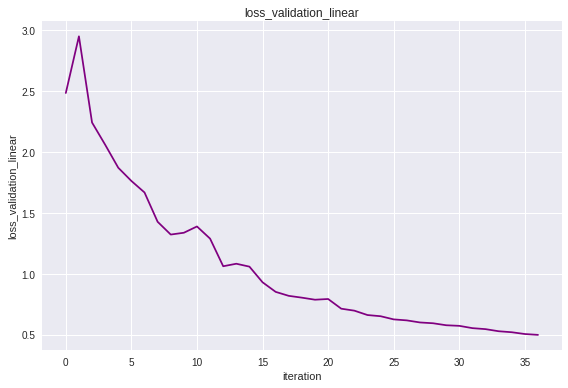

In [113]:
# visualizing loss

losses_validation_np_AdaGrad = losses_validation_np_AdaGrad.reshape(-1,1)
dict_losses_validation = {"loss_validation_linear" :losses_validation_np_AdaGrad }
viz = visualization()
viz.live_visualization(dict_losses_validation)


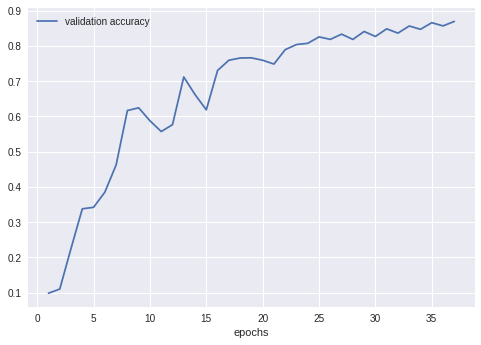

In [114]:
#accuracy
arr_acc_AdaGrad = model_linear.evaluate_accuracy(validation_label,pred_validation_np_AdaGrad)

#visualizing accuracy
dict_x ={"epochs" :list(range(1, epochs_no_AdaGrad + 1))}
dict_y = {"validation accuracy":arr_acc_AdaGrad}

viz.visualize(dict_x,dict_y)

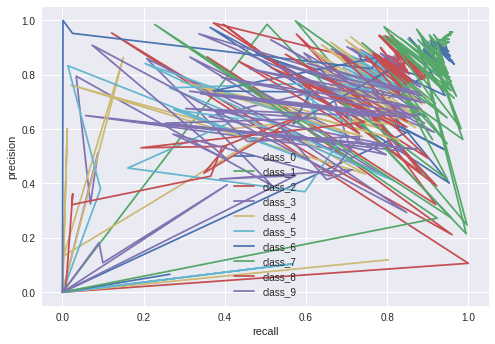

In [115]:
#recall
arr_recall_AdaGrad, recall_dict_AdaGrad = model_linear.evaluate_recall(validation_label,pred_validation_np_AdaGrad)
#precision
arr_precision_AdaGrad, precision_dict_AdaGrad = model_linear.evaluate_precision(validation_label,pred_validation_np_AdaGrad)

viz = visualization()
viz.visualize_PR("recall","precision",recall_dict_AdaGrad, precision_dict_AdaGrad)

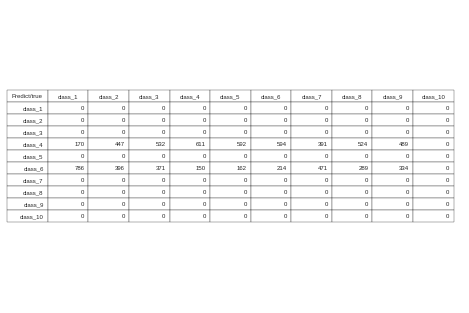

In [156]:
#confusion matrix
evaluate = Evaluation()

arr_pred_AdaGrad_Epoch = pred_validation_np_AdaGrad.reshape(epochs_no_AdaGrad,-1,1)[0]
confusionMatrixDict = evaluate.get_confusion_matrix_components(10,validation_label,arr_pred_AdaGrad_Epoch)

viz = visualization()
viz.draw_table(confusionMatrixDict)


In [121]:
#saving model
utils_ = utils()
utils_.save_model_compressed(model_linear,"model_linear")

In [123]:
#loading model 
loaded_model_linear = utils_.load_model_compressed("model_linear")

# MNIST with CNN Example

In [100]:
X_train = train_array 
y_train = train_label 
x_validation = validation_array
y_validation = validation_label

# reshaping
X_train, x_validation = X_train.reshape(-1, 1, 28, 28), x_validation.reshape(-1, 1, 28, 28)
y_train, y_validation = y_train.reshape(-1, 1), y_validation.reshape(-1, 1)

# normalizing and scaling data
X_train, x_validation = X_train.astype('float32')/255 , x_validation.astype('float32')/255

# Adagrad optimizers
optim_conv1 = Optimizer("AdaGrad",alpha = 0.1)
optim_LCN1 = Optimizer("AdaGrad",alpha = 0.1)
optim_conv2 = Optimizer("AdaGrad",alpha = 0.1)
optim_LCN2 = Optimizer("AdaGrad",alpha = 0.1)
optim_linear = Optimizer("AdaGrad",alpha = 0.1)

model_cnn = Model(layers=[Conv(optim_conv1,1, 4, 3, padding=1), MaxPool(kernel_size=2), ReLU(), LCN(optim_LCN1,4),
                      Conv(optim_conv2,4, 8, 3, padding=1), MaxPool(kernel_size=2), ReLU(), LCN(optim_LCN2,8),
                      Flatten(), Linear(7*7*8,10,optim_linear),Softmax()],
              loss=Multinomial_Logistic_Regression())

pred_training_arr , loss_training_arr, pred_validation_arr , loss_validation_arr= model_cnn.train_cnn_by_epochs_no(X_train,y_train,x_validation,y_validation,5,100)



start training ...
Loss at epoch no.1 = 3.0464978172892336
__________________________________
Loss at epoch no.1 = 2.7100000634062478
__________________________________
Loss at epoch no.2 = 10.367902543009366
__________________________________
Loss at epoch no.2 = 10.596739863134225
__________________________________
Loss at epoch no.3 = 10.838637384701574
__________________________________
Loss at epoch no.3 = 9.010752283934792
__________________________________
Loss at epoch no.4 = 5.562275703722909
__________________________________
Loss at epoch no.4 = 5.974964791981333
__________________________________
Loss at epoch no.5 = 11.870034221641754
__________________________________
Loss at epoch no.5 = 10.31216214971502
__________________________________


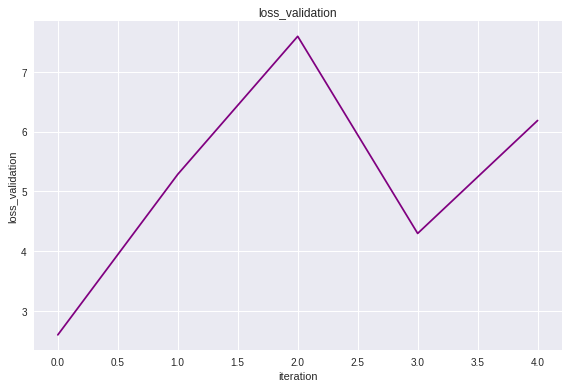

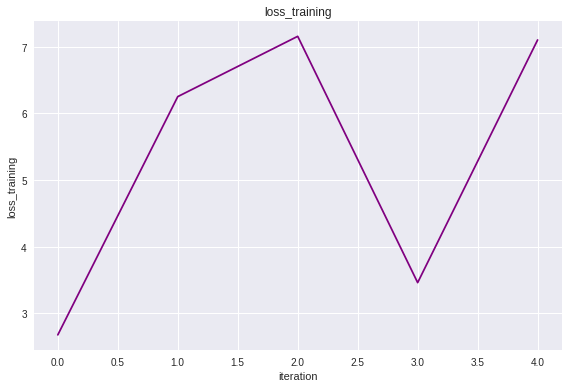

In [95]:
# visualizing loss

loss_validation_arr = loss_validation_arr.reshape(-1,1)
dict_losses_validation = {"loss_validation" :loss_validation_arr }
viz = visualization()
viz.live_visualization(dict_losses_validation)

loss_training_arr = loss_training_arr.reshape(-1,1)
dict_losses_training = {"loss_training" :loss_training_arr }
viz.live_visualization(dict_losses_training)

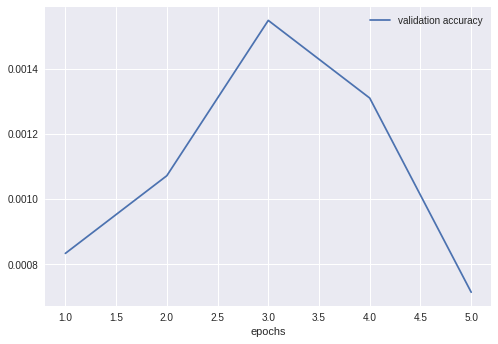

In [97]:
#accuracy
arr_acc_validation = model.evaluate_accuracy(y_validation,pred_validation_arr)

#visualizing accuracy
dict_x ={"epochs" :list(range(1, 5 + 1))}
dict_y = {"validation accuracy":arr_acc_validation}

viz.visualize(dict_x,dict_y)

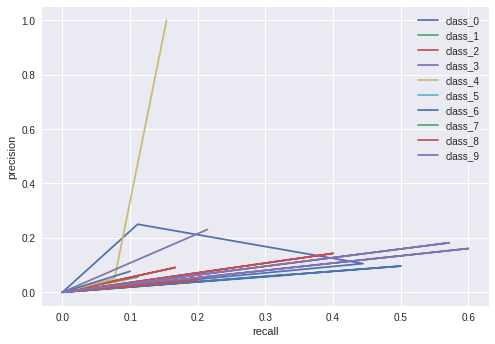

In [98]:
# recall
arr_precision_AdaGrad, precision_dict_AdaGrad = model.evaluate_precision(y_validation,pred_validation_arr)
#precision
arr_recall_AdaGrad, recall_dict_AdaGrad = model.evaluate_recall(y_validation,pred_validation_arr)

viz = visualization()
viz.visualize_PR("recall","precision",recall_dict_AdaGrad, precision_dict_AdaGrad)


In [107]:
#saving model
utils_ = utils()
utils_.save_model_compressed(model_cnn,"model_cnn")

In [108]:
#loading model 
loaded_model_cnn = utils_.load_model_compressed("model_cnn")